In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import warnings
import statistics

In [63]:
## Reading the CSV File 

Weather_data = pd.read_csv("Bombing_Weather_Data.csv")
Weather_data.drop(Weather_data.columns[[0]], axis=1, inplace=True)
Weather_data.head(10)

,Unnamed: 0.1,Success,Month,Day,Year,Country,DefCity,DefCountry,Latitude,Longitude,...,MeanTemp,MinAirTemp,SunDuration,MeanCloudCover,MeanCloudVapor,MeanRelHumid,PrecipHeight,PrecipForm,MeanPressure,SnowDepth
0,3,0,9,3,1939,United Kingdom,Wilhelmshaven,Germany,53.53234,8.106872,...,67.868000,55.295000,7.757143,4.500000,17.153333,73.800000,1.433333,0.0,1011.783333,0.000000
1,4,0,9,3,1939,United Kingdom,Wilhelmshaven,Germany,53.53234,8.106872,...,67.868000,55.295000,7.757143,4.500000,17.153333,73.800000,1.433333,0.0,1011.783333,0.000000
2,5,0,9,4,1939,United Kingdom,Wilhelmshaven,Germany,53.53234,8.106872,...,63.512000,56.735000,1.957143,6.573333,15.940000,79.266667,8.813333,1.0,1010.033333,0.000000
3,6,0,9,4,1939,United Kingdom,Wilhelmshaven,Germany,53.53234,8.106872,...,63.512000,56.735000,1.957143,6.573333,15.940000,79.266667,8.813333,1.0,1010.033333,0.000000
4,11,1,12,18,1939,Germany,Wilhelmshaven,Germany,53.53234,8.106872,...,22.676000,13.792308,2.775000,2.180000,3.520000,83.800000,0.000000,0.0,1021.316667,0.066667
5,18,1,5,15,1940,United Kingdom,Ruhr,Germany,51.37315,7.629154,...,56.783158,42.440000,12.266667,2.386842,9.711111,62.611111,0.005263,0.0,984.091304,0.000000
6,19,1,5,19,1940,France,Berlin,Germany,52.52001,13.404950,...,51.431429,38.942857,8.600000,4.890000,7.861111,61.894737,0.709091,0.0,999.964706,0.000000
7,24,1,6,7,1940,France,Berlin,Germany,52.52001,13.404950,...,66.609091,51.645714,13.915385,2.214286,13.916667,64.300000,0.000000,0.0,997.572222,0.000000
8,30,1,8,25,1940,United Kingdom,Berlin,Germany,52.52001,13.404950,...,57.157143,47.042857,2.978571,7.380000,13.461111,85.842105,1.509091,1.0,1004.058824,0.000000
9,37,1,1,21,1941,Germany,Berlin,Germany,52.52001,13.404950,...,37.092941,28.965714,0.028571,7.737500,6.366667,85.125000,1.811765,1.0,974.200000,19.187500


In [143]:
### Creating a list for Independent Variables


### Selecting all the parameters here for now, we can change it later 

independent_variables = ['MeanTemp','SunDuration',
                         'MeanCloudCover',
                         'PrecipForm']


predictors = Weather_data[independent_variables]



### Success as the Denendent Variable

success = Weather_data.Success 

In [144]:
import statsmodels.api as sm
probit_model = sm.Probit(Weather_data['Success'],Weather_data[independent_variables])
result_probit = probit_model.fit()
print(result_probit.summary2())

Optimization terminated successfully.
         Current function value: 0.446831
         Iterations 6
                        Results: Probit
Model:              Probit           Pseudo R-squared: 0.115   
Dependent Variable: Success          AIC:              65.1943 
Date:               2019-02-15 18:16 BIC:              73.8299 
No. Observations:   64               Log-Likelihood:   -28.597 
Df Model:           3                LL-Null:          -32.301 
Df Residuals:       60               LLR p-value:      0.059975
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     6.0000                                     
---------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------
MeanTemp        -0.0447   0.0221 -2.0215 0.0432 -0.0881 -0.0014
SunDuration      0.2355   0.0946  2.4884 0.0128  0.0500  0.4210
MeanCloudCover   0.4085   

In [145]:
result_predict_probit = result_probit.predict(Weather_data[independent_variables])
print(result_predict_probit)

0     0.736052
1     0.736052
2     0.523279
3     0.523279
4     0.702087
5     0.907492
6     0.957633
7     0.885701
8     0.819272
9     0.896326
10    0.968147
11    0.923080
12    0.809126
13    0.851756
14    0.260342
15    0.831007
16    0.924530
17    0.792577
18    0.944218
19    0.849899
20    0.900299
21    0.858199
22    0.964900
23    0.867310
24    0.825209
25    0.623487
26    0.800068
27    0.848026
28    0.794039
29    0.862604
        ...   
34    0.810493
35    0.890476
36    0.835715
37    0.890486
38    0.762998
39    0.542475
40    0.799034
41    0.667365
42    0.857388
43    0.952361
44    0.930151
45    0.742000
46    0.957630
47    0.655236
48    0.621555
49    0.945127
50    0.796491
51    0.650899
52    0.547275
53    0.861133
54    0.872140
55    0.899133
56    0.691124
57    0.849289
58    0.815857
59    0.838559
60    0.595623
61    0.844002
62    0.599618
63    0.954897
Length: 64, dtype: float64


### Change the Threshold to get optimum results

In [170]:
threshold = 0.69

threshold_success = np.where(result_predict_probit>threshold,1,0)
print(threshold_success)

[1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1]


In [171]:
#### Build a Confusion Metrics

# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Weather_data.Success, threshold_success)
cnf_matrix

array([[ 4,  9],
       [ 8, 43]])

Text(0.5, 257.44, 'Predicted label')

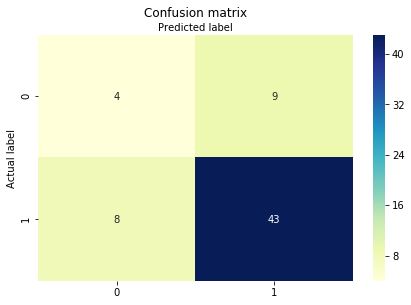

In [172]:
#### Draw the Confusion Metric plot

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [173]:
print("Accuracy:",metrics.accuracy_score(threshold_success, Weather_data.Success))
print("Precision:",metrics.precision_score(threshold_success, Weather_data.Success))
print("F1-Score:",metrics.f1_score(threshold_success, Weather_data.Success))

Accuracy: 0.734375
Precision: 0.8431372549019608
F1-Score: 0.8349514563106797
